<a href="https://colab.research.google.com/github/Kapongz/Bootstrap-test/blob/main/Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**hierarchical clustering**

> ເຊິ່ງເອີ້ນກັນວ່າ ການວິເຄາະກຸ່ມຕາມລຳດັບ, ແມ່ນລະບົບວິທີການທີ່ຈັດກຸ່ມວັດຖຸທີ່ຄ້າຍຄືກັນອອກເປັນກຸ່ມທີ່ເອີ້ນວ່າ clusters.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'



**1.   import pandas as pd**

> ນຳເອົາ Pandas ມາໃຊ້ແລ້ວຕັ້ງຊື່ໂຕປ່ຽນເປັນ pd ເພື່ອນຳເອົາໄປໃຊ້

> pandas ໃຊ້ໃນການຈັດການຂໍ້ມູນຂະໜາດນ້ອຍຈົນໄປຮອດຂໍ້ມູນຂະໜາດໃຫຍ່

**2.   import numpy as np**


> ນຳເອົາ numpy ມາໃຊ້ແລ້ວຕັ້ງຊື່ໂຕປ່ຽນເປັນ np ເພື່ອນຳເອົາໄປໃຊ້

> numpy ແມ່ນ Libary ທີ່ໃຊ້ໃນການຄຳນວນທາງຄະນິດສາດຂອງພາສາ Python ໂດຍ numpy ສາມາດຈັດການ ອາເຣ (array) ຫຼາຍມິຕິໄດ້

**3.   import matplotlib.pyplot as plt**

> ນຳເອົາ matplotlib.pyplot ມາໃຊ້ແລ້ວຕັ້ງຊື່ໂຕປ່ຽນເປັນ plt ເພື່ອນຳເອົາໄປໃຊ້

> matplotlib ແມ່ນ Module ພື້ນຖາມໃນການສ້າງກຣາຟ ໃນພາສາ python

**4.   import seaborn as sns**

> ນຳເອົາ seaborn ມາໃຊ້ແລ້ວຕັ້ງຊື່ໂຕປ່ຽນເປັນ sns ເພື່ອນຳເອົາໄປໃຊ້

> seaborn ເປັນ libary ຂອງ matplotlib ທີ່ໃຊ້ໄວ້ແຈກແຈງໃຫ້ເຮົາເຫັນພາບຂໍ້ມູນທີ່ເປັນແບບ ສຸ່ມ



**5.   %matplotlib inline**


> ແມ່ນ Magic command ທີ່ເຮັດໃຫ້ແຜນພາບທີ່ສ້າງໂດຍ matplotlib ສະແດງໃນເຊວ IPython 




**6.   %config InlineBackend.figure_format='retina'**

> ໃຊ້ %config InlineBackend. figure_format = 'retina' ຫຼັງຈາກ %matplotlib inline ເພື່ອສະແດງຮູບພາບທີ່ມີຄວາມລະອຽດສູງ

---

In [ ]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')


pandas  version = 1.3.5
numpy   version = 1.21.6
seaborn version = 0.11.2




> **ສະແດງ version ຂອງ** ***pandas*** , ***numpy*** , ***seaborn***

---


In [ ]:
pd.Timestamp.now()

Timestamp('2022-12-08 10:59:35.228291')



> **ສະແດງ ປີ-ເດືອນ-ວັນ ເວລາ  Timezone US/Pacific ສາມາດ custom ເປັນ Timezone ປະເທດເຮົາໄດ້ pd.Timestamp.now(tz='asia/vientiane')**


---



In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.csv')
df.sample(10)


,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0
51,Raspberry Cheese Louise,220,9.0,0.3,30,24,5.0
48,Praline ‘n Cream,270,14.0,0.4,32,26,4.0
5,Blueberry Cheesecake,150,8.0,0.3,18,14,3.0
31,Made with Snickers,170,9.0,0.3,21,16,3.0
14,Chocolate Fudge,150,9.0,0.3,17,12,3.0
41,Peanut Butter ‘n Banana,180,12.0,0.3,15,11,4.0
34,Mango Tango,230,10.0,0.4,29,24,4.0
19,Cookies ‘n Cream,270,17.0,0.4,25,18,5.0
6,Brownie Sundae(No Sugar Added),120,5.0,0.1,21,4,3.0




> **df ເປັນຕົວປ່ຽນສ້າງໄວ້ເກັບຄ່າຈາກການໃຊ້ pandas ຫຼື pd ອ່ານຟາຍນາມສະກຸນ csv ໃນຕົວຢ່າງຈະເປັນ Link ຂອງຟາຍ csv ມີຂໍ້ມູນຫຼາກຫຼາຍທີ່ເອົາໄວ້ໃນ repository github**

> **df.sample(10) ແມ່ນຈະເອົາຕົວປ່ຽນທີ່ເຮົາເກັບຄ່າໄວ້ແລ້ວເອົາຂໍ້ມູນມາສະແດງໂດຍໃຊ້ .sample(10) ຄືຈະ Random ຕົວຢ່າງມາ 10 ແຖວຈາກຂໍ້ມູນທີ່ມີທັງໝົດໃນຟາຍນັ້ນ**


---







In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB




> **df.info(): .info() ຈະເປັນ function ເພື່ອສະແດງຂໍ້ມູນລາຍລະອຽດທັງໝົດໃນ DataFrame ແບບຫຍໍ້**


---




#**Scikit-learn: Hierarchical** **Clustering**


> **Scikit-learn ແມ່ນ machine learning library ໃນພາສາການຂຽນໂປຣແກຣມ Python**





In [ ]:
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch # draw dendrogram




> **from sklearn import preprocessing ເປັນການ import preprocessing ມາຈາກ sklearn ເຊິ່ງ preprocessing ແມ່ນເຕັກນິກທີ່ຖືກນໍາໃຊ້ເພື່ອປ່ຽນຂໍ້ມູນດິບເຂົ້າໄປໃນຊຸດຂໍ້ມູນທີ່ສະອາດ.**

> **from sklearn.cluster import AgglomerativeClustering ເປັນການ import AgglomerativeClustering ມາຈາກ sklearn.cluster ເຊິ່ງ AgglomerativeClustering ແມ່ນເປັນປະເພດຂອງ Hierarchical Clustering ມັນເປັນການຈັດກຸ່ມການຮ່ວມກຸ່ມ. ປະສົມຄູ່ຂອງກຸ່ມຂໍ້ມູນຕົວຢ່າງແບບວົນຊໍ້າ ໃຊ້ໄລຍະເຊື່ອມໂຍງ**

> **import scipy.cluster.hierarchy ເປັນການ import scipy.cluster.hierarchy ເຂົ້າມາໃຊ້ ແລ້ວແທນດ້ວຍໂຕປ່ຽນ sch ເຊິ່ງ scipy.cluster.hierarchy ແມ່ນ functions ຕັດການແບ່ງກຸ່ມຕາມລຳດັບເປັນກຸ່ມ [flat clusterings](https://nlp.stanford.edu/IR-book/html/htmledition/flat-clustering-1.html#:~:text=Flat%20clustering%20creates%20a%20flat,problem%20of%20labeling%20clusters%20automatically.) ຫຼື ຄົ້ນຫາຮາກຂອງ forest ທີ່ເກີດຈາກການຕັດໂດຍການໃຊ້ລະຫັດ flat cluster ids ຂອງການສັງເກດແຕ່ລະຄັ້ງ**

> **dendrogram ແມ່ນແຜນວາດຕົ້ນໄມ້ທີ່ມັກໃຊ້ເພື່ອວາດພາບຜົນຂອງການຈັດກຸ່ມຕາມລຳດັບ.**









In [ ]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']


> **cols ແມ່ນໂຕປ່ຽນ ທີ່ເກັບຊື່ Column ຂອງ dataFrame ເປັນຮູບແບບ array**

In [ ]:
## Yeo-Johnson transformation (preferable)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) # support only positive value
mat = pt.fit_transform(df[cols])
mat[:5].round(4)


array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])



> **pt ແມ່ນໂຕປ່ຽນໄວ້ເກັບຄ່າທີ່ໄດ້ຈາກການ preprocessing.PowerTransformer ແລະ PowerTransformer ແມ່ນເປັນຕະກູນຂອງການແປງແບບ parametric ແບບ monotonic ທີ່ຖືກນໍາໃຊ້ເພື່ອເຮັດໃຫ້ຂໍ້ມູນຄ້າຍຄື Gaussian ຫຼາຍ**

> **method='yeo-johnson' ເປັນວິທີແປງຟາຍ yeo-johnson ແມ່ນເຮັດວຽກກັບຄ່າທາງບວກແລະລົບ**

> **standardize=True ຕັ້ງເປັນ True ເພື່ອນຳໃຊ້ຄ່າສູນ,**

> **mat ແມ່ນຕົວປ່ຽນທີ່ໄດ້ຈາກການເອົາ pt ໄປ fit_transform(df[cols]) **

> **fit(data) ຖືກນໍາໃຊ້ເພື່ອຄິດໄລ່ຄ່າສະເລ່ຍ ແລະ std dev ສໍາລັບຄຸນສົມບັດທີ່ໃຫ້ມາເພື່ອນໍາໃຊ້ຕື່ມອີກສໍາລັບການປັບຂະຫນາດ.**

> **transform(data) ຖືກນໍາໃຊ້ເພື່ອປັບຂະຫນາດໂດຍໃຊ້ຄ່າສະເລ່ຍ ແລະ std dev ຄິດໄລ່ໂດຍໃຊ້ວິທີການ .fit()**

> **fit_transform() ແມ່ນລວມ fit ແລະ transform .**

> **df[cols] ແມ່ນ Dataframe ພ້ອມຂໍ້ມູນພາຍໃນ Column**

> **mat[:5] ແບ່ງສ່ວນຂໍ້ມູນໃນ array ເປັນ  5 **

> **.round(4) ຟັງຊັນສົ່ງຄືນຕົວເລກຈຸດທີ່ເປັນຕົວເລກແບບເສດ ແລະ ຕົວເລກທົດສະນິຍົມ**


In [ ]:
X=pd.DataFrame(mat, columns=cols)
X.head()


,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181




> **X** ເປັນໂຕປ່ຽນທີ່ເອົາໄວ້ເກັບຂໍ້ມູນຈາກການເອົາ pd.DataFrame(mat, columns=cols)

> **DataFrame ແມ່ນໂຄງສ້າງຂໍ້ມູນແບບ 2 ມິຕິທີ່ມີຖັນຂອງປະເພດຕ່າງໆ. ex: padas.DataFrame(data,column=['column-name'])**

> **X.head() ເປັນການເອົາຂໍ້ມູນ 5 ແຖວທຳອີດມາສະແດງ **







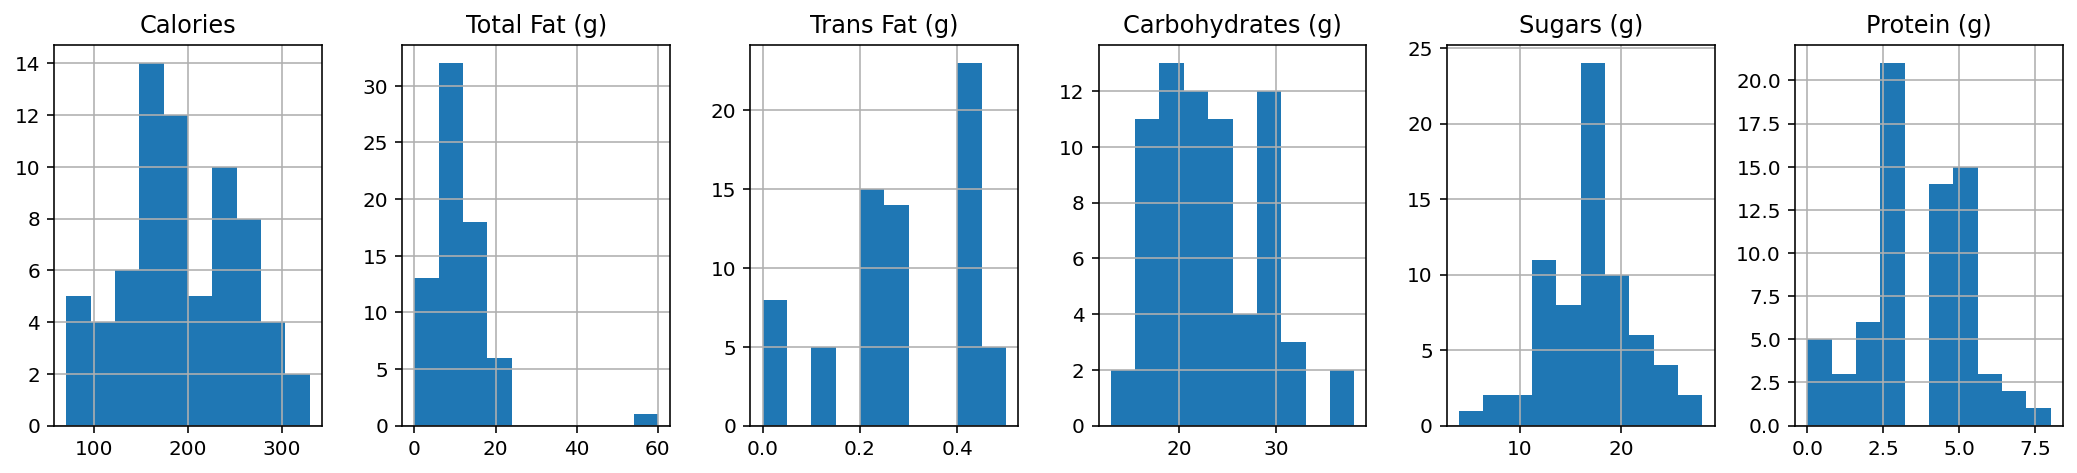

In [ ]:
df[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));



> ການເອົາ Dataframe ມາສະແດງເປັນ graph

> ຟັງຊັນ hist() ໃນໂມດູນ pyplot ຂອງ library matplotlib ແມ່ນໃຊ້ເພື່ອວາງ [histogram](https://www.w3schools.com/python/matplotlib_histograms.asp#:~:text=Histogram,observations%20within%20each%20given%20interval.) ພາຍໃນກໍຈະມີການກຳນົດ layout ແລະ ຂະໜາດຂອງ garph

> Layout() ແມ່ນ Container ທີ່ໃຊ້ໃນການຈັດວາງ widget ໃນລັກສະນະສະເພາະ

> len() ແມ່ນຫນຶ່ງໃນ functions ຂອງ Python ມັນສົ່ງຄືນຄ່າຄວາມຍາວຂອງວັດຖຸ

> figsize() ແມ່ນຂະຫນາດຂອງຮູບພາບທີ່ສົ່ງອອກ


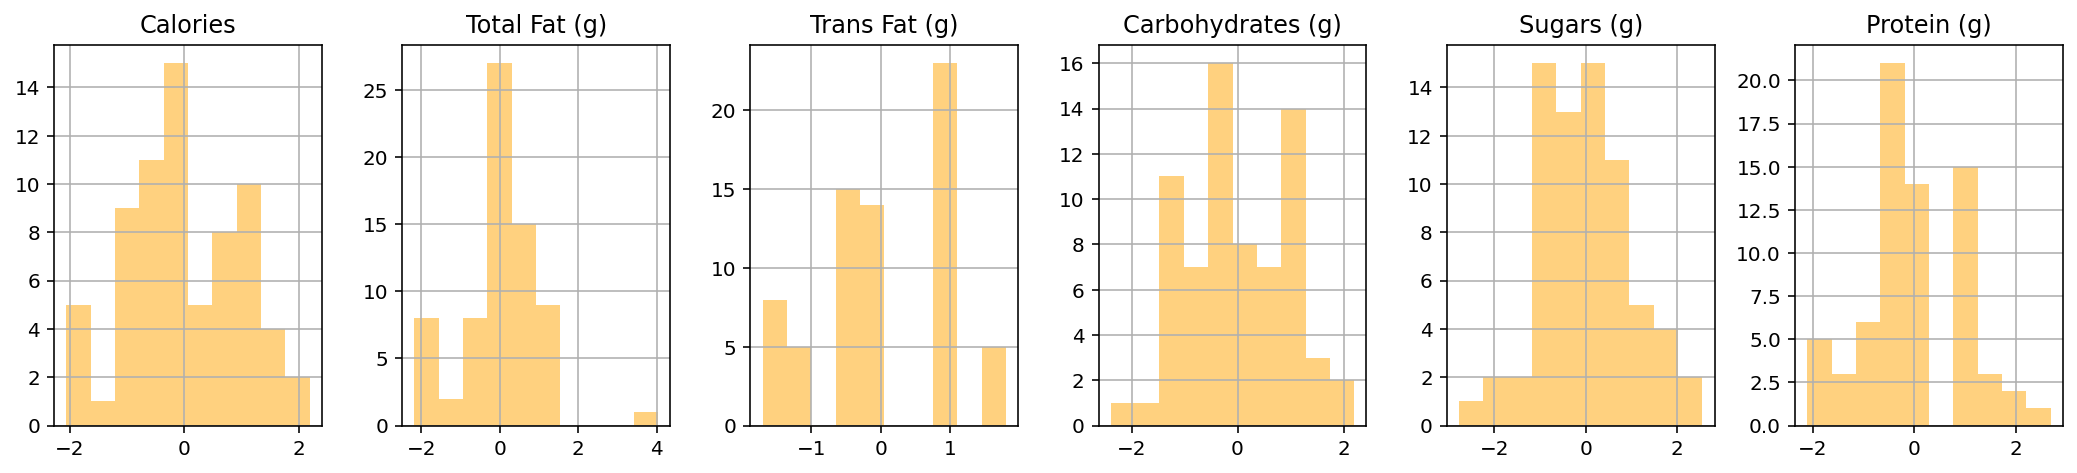

In [ ]:
X[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange', alpha=.5);



> X ເປັນ Dataframe ທີ່ໄດ້ຈາກການ fit_tranform ຫຼັງຈາກນັ້ນກໍນຳໄປໃຊ້ hist() function ແລະ ມີການກຳນົດມາເພີ່ມ color ແລະ alpha

> Alpha ຄວາມໂປ່ງໃສຂອງຮູບ


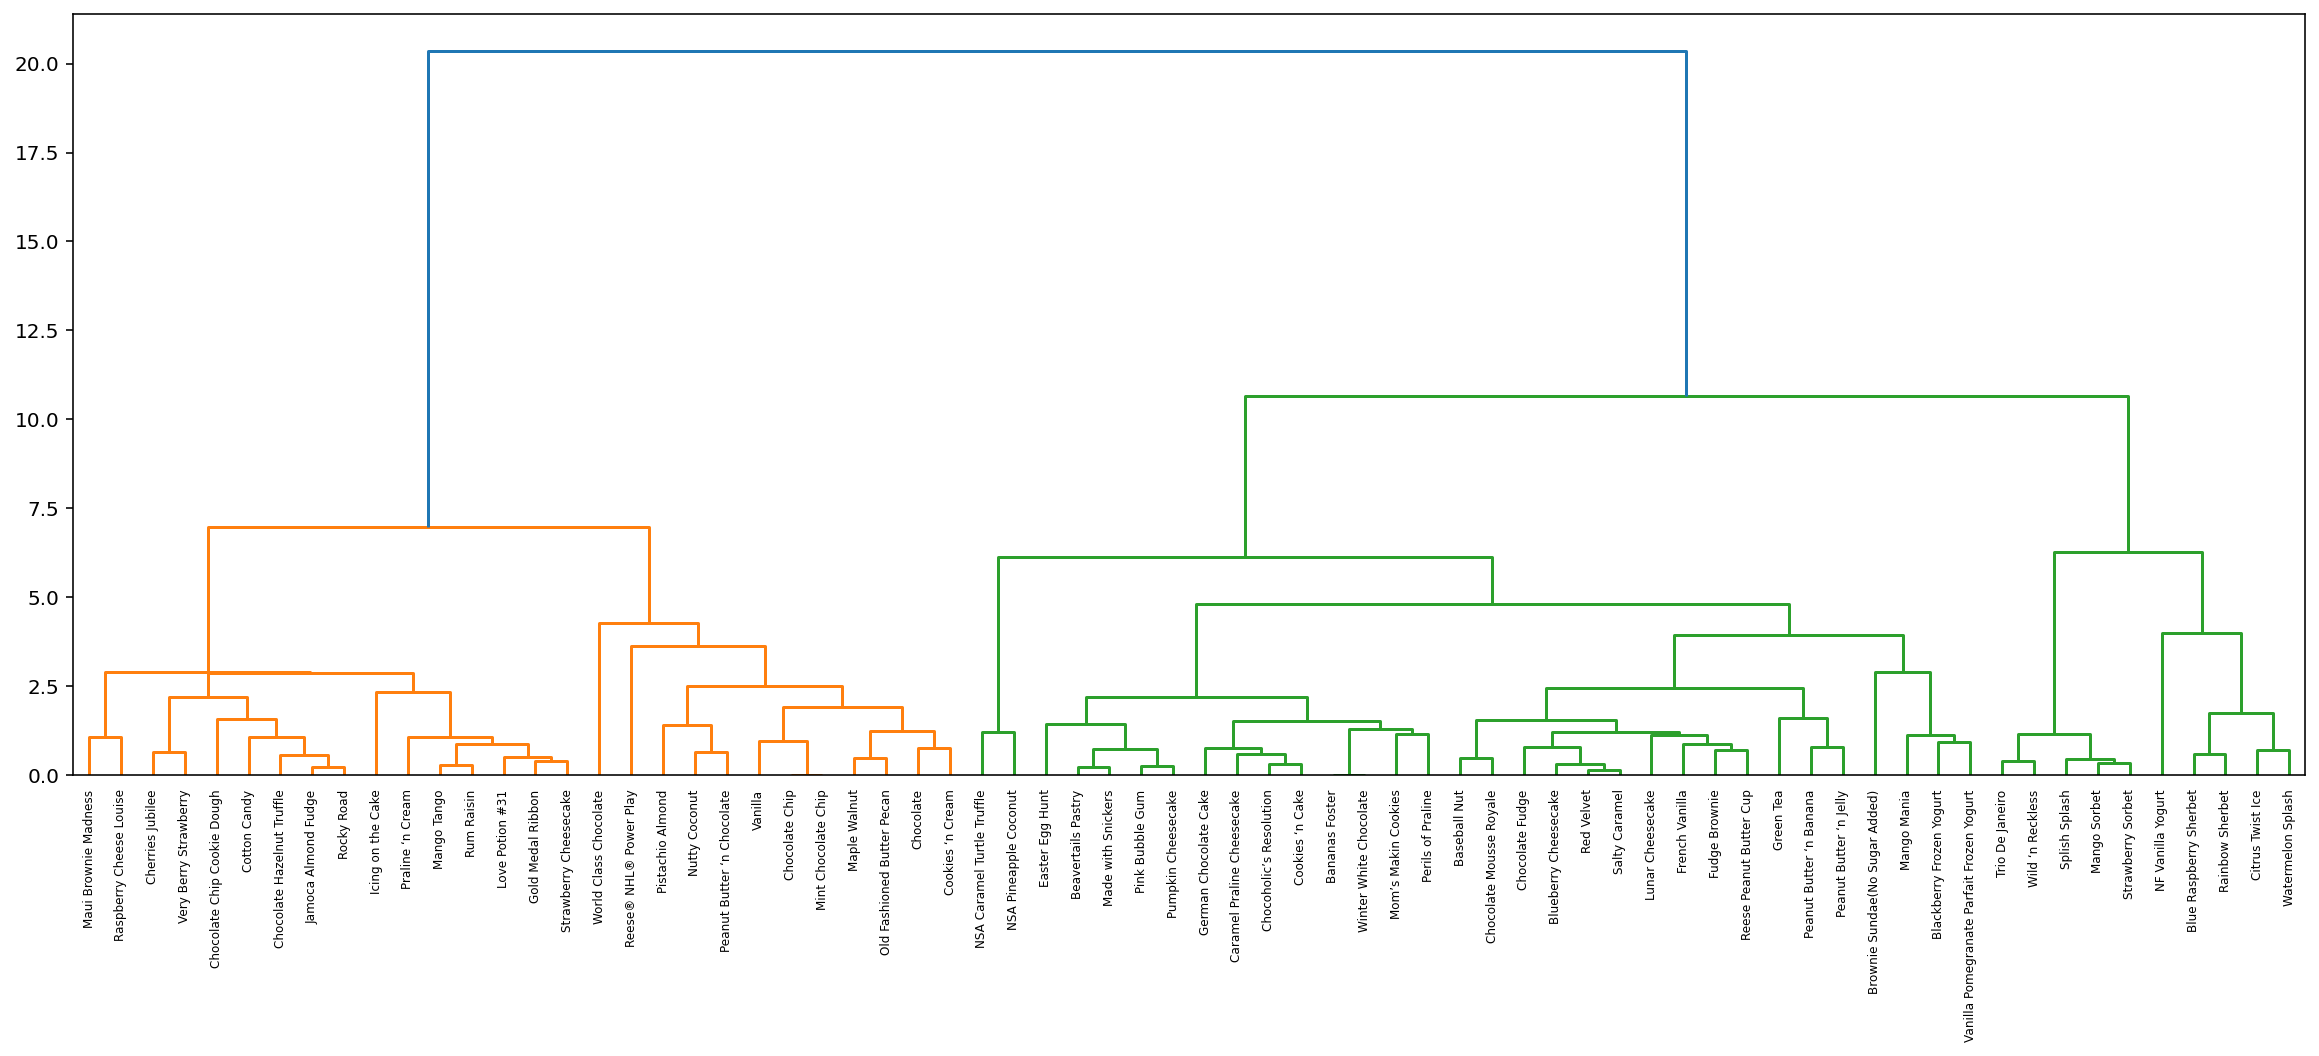

In [ ]:
fig, ax=plt.subplots(figsize=(20, 7))
dg=sch.dendrogram(sch.linkage(X, method='ward'), ax=ax, labels=df['Flavour'].values)
# dg=sch.dendrogram(sch.linkage(df[cols], method='ward'), ax=ax)




> fig : matplotlib. pyplot. ວັດ​ຖຸ​ຮູບທີ່​ຈະ​ຖືກ​ນໍາ​ໃຊ້​ເປັນບ່ອນເກັບ​ສໍາ​ລັບ​ການ​ຍ່ອຍ​ທັງ​ຫມົດ​.

> ax : ວັດຖຸດຽວຂອງແກນ. ແກນວັດຖຸຖ້າມີພຽງ plot ອັນດຽວ, ຫຼືອາເຣຂອງແກນ.Axes objects ຖ້າມີຫຼາຍຕອນ plot, ຕາມທີ່ລະບຸໄວ້ໂດຍ nrows ແລະ ncols .


> subplots method ສະໜອງວິທີການການລົງຈຸດຫຼາຍໆ ແປງໃນຮູບດຽວ

> dg ແມ່ນໂຕປ່ຽນ ເອົາໄວ້ເກັບຄ່າຈາກການເອົາ scipy.cluster.hierarchy.dendrogam ກໍຄືການສ້າງຮູບແຜນວາດຮູບແບບຕົ້ນໄມ້

> linkage(X, 'ward') ສ້າງມາຕຣິກເບື້ອງການເຊື່ອມໂຍງ

> 'ward' ແມ່ນຫນຶ່ງໃນວິທີການທີ່ສາມາດນໍາໃຊ້ເພື່ອຄິດໄລ່ໄລຍະຫ່າງລະຫວ່າງກຸ່ມທີ່ສ້າງຂຶ້ນໃຫມ່

> labels ເພື່ອສະແດງໜຶ່ງ ຫຼືຫຼາຍແຖວຂອງຂໍ້ຄວາມໃນວິດເຈັດ, ໃຫ້ຕັ້ງຕົວເລືອກນີ້ເປັນສະຕຣິງທີ່ມີຂໍ້ຄວາມ.

> .value ສົ່ງຄືນ object ເພື່ອເບິ່ງ



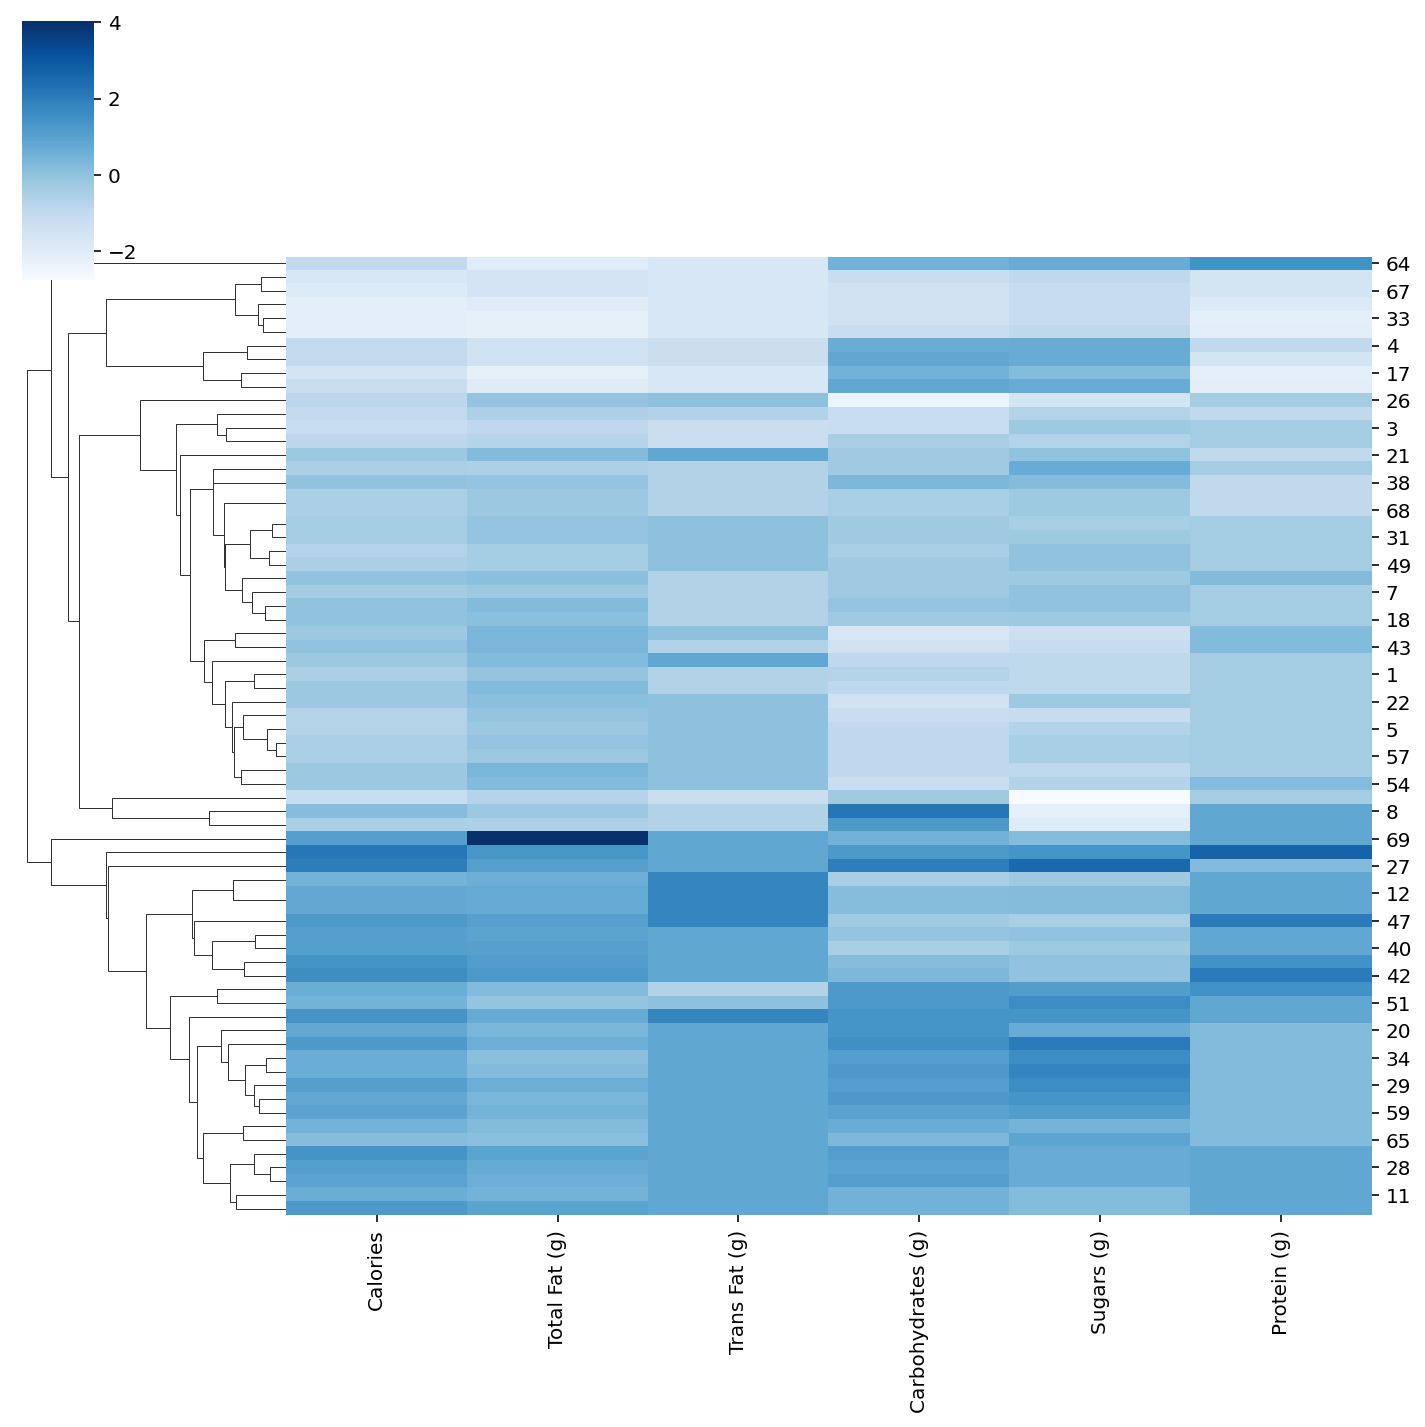

In [ ]:
# doc: https://seaborn.pydata.org/generated/seaborn.clustermap.html
sns.clustermap(X, col_cluster=False, cmap="Blues")




> ໃຊ້ seaborn.clustermap clustermap ການແຕ້ມແຜນພາບ plot ຊຸດຂໍ້ມູນ matrix ທີ່ເປັນ heatmap ແບບລະດັບຊັ້ນ.

> col_cluster ຖ້າ true, ໃຫ້ຈັດກຸ່ມ {rows, columns}

> cmap ສີ


In [ ]:
hc=AgglomerativeClustering(n_clusters=2, linkage='ward')
hc


AgglomerativeClustering()



> hc ແມ່ນໂຕແປທີ່ໃຊ້ໄວ້ເກັບຄ່າໂດຍໃຊ້ AgglomerativeClustering ຈັດການການລວມກຸ່ມ

> n_clusters ຈໍານວນກຸ່ມທີ່ຈະປະກອບເປັນຈໍານວນ centroids ທີ່ຈະສ້າງ


In [ ]:
hc.fit(X)

AgglomerativeClustering()



> ເອົາໂຕແປ hc ມາ fit ໂດຍຈະໃຊ້ຂໍ້ມູນທີ່ຢູ່ໃນ dataframe X



In [ ]:
df['cluster']=hc.labels_
df.head()


,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0




> 





> ເປັນການເພີ່ມ column ໃນ dataframe df ແລະ cluster ແຕ່ລະຈຸດ

> df.head() ເອົາ dataframe 5 ແຖວທຳອິດອອກມາສະແດງ







In [ ]:
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
57,Salty Caramel,160,8.0,0.3,18,15,3.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0,1
49,Pumpkin Cheesecake,160,7.0,0.3,21,17,3.0,0
24,German Chocolate Cake,190,10.0,0.2,21,16,4.0,0
46,Pink Bubble Gum,150,7.0,0.3,20,17,3.0,0
18,Cookies ‘n Cake,190,10.0,0.2,21,16,3.0,0
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
35,Maple Walnut,260,17.0,0.4,22,17,5.0,1




> Random ຂໍ້ມູນມາສະແດງ 10 row




In [ ]:
df.groupby('cluster').agg(['count', 'mean', 'median']).T

cluster                            0           1
Calories          count    42.000000   28.000000
                  mean    149.761905  254.642857
                  median  160.000000  255.000000
Total Fat (g)     count    42.000000   28.000000
                  mean      6.819048   16.178571
                  median    8.000000   14.500000
Trans Fat (g)     count    42.000000   28.000000
                  mean      0.190476    0.407143
                  median    0.200000    0.400000
Carbohydrates (g) count    42.000000   28.000000
                  mean     20.238095   26.892857
                  median   20.000000   28.000000
Sugars (g)        count    42.000000   28.000000
                  mean     14.571429   20.428571
                  median   15.000000   20.000000
Protein (g)       count    42.000000   28.000000
                  mean      2.635714    4.964286
                  median    3.000000    5.000000



> GroupBy ເປັນຫນ້າທີ່ທີ່ມີປະສິດທິພາບແລະຫລາກຫລາຍໃນ Python. ມັນຊ່ວຍໃຫ້ທ່ານສາມາດແຍກຂໍ້ມູນຂອງອອກເປັນກຸ່ມແຍກຕ່າງຫາກເພື່ອການຄຳນວນສໍາລັບການວິເຄາະທີ່ດີຂຶ້ນ.

> agg() ອະນຸຍາດໃຫ້ທ່ານນໍາໃຊ້ຟັງຊັນຫຼື List ຂອງຟັງຊັນທີ່ຈະດໍາເນີນການຕາມແກນໃດແກນຫນຶ່ງຂອງ DataFrame, default = 0, ເຊິ່ງເປັນແກນ index (row)





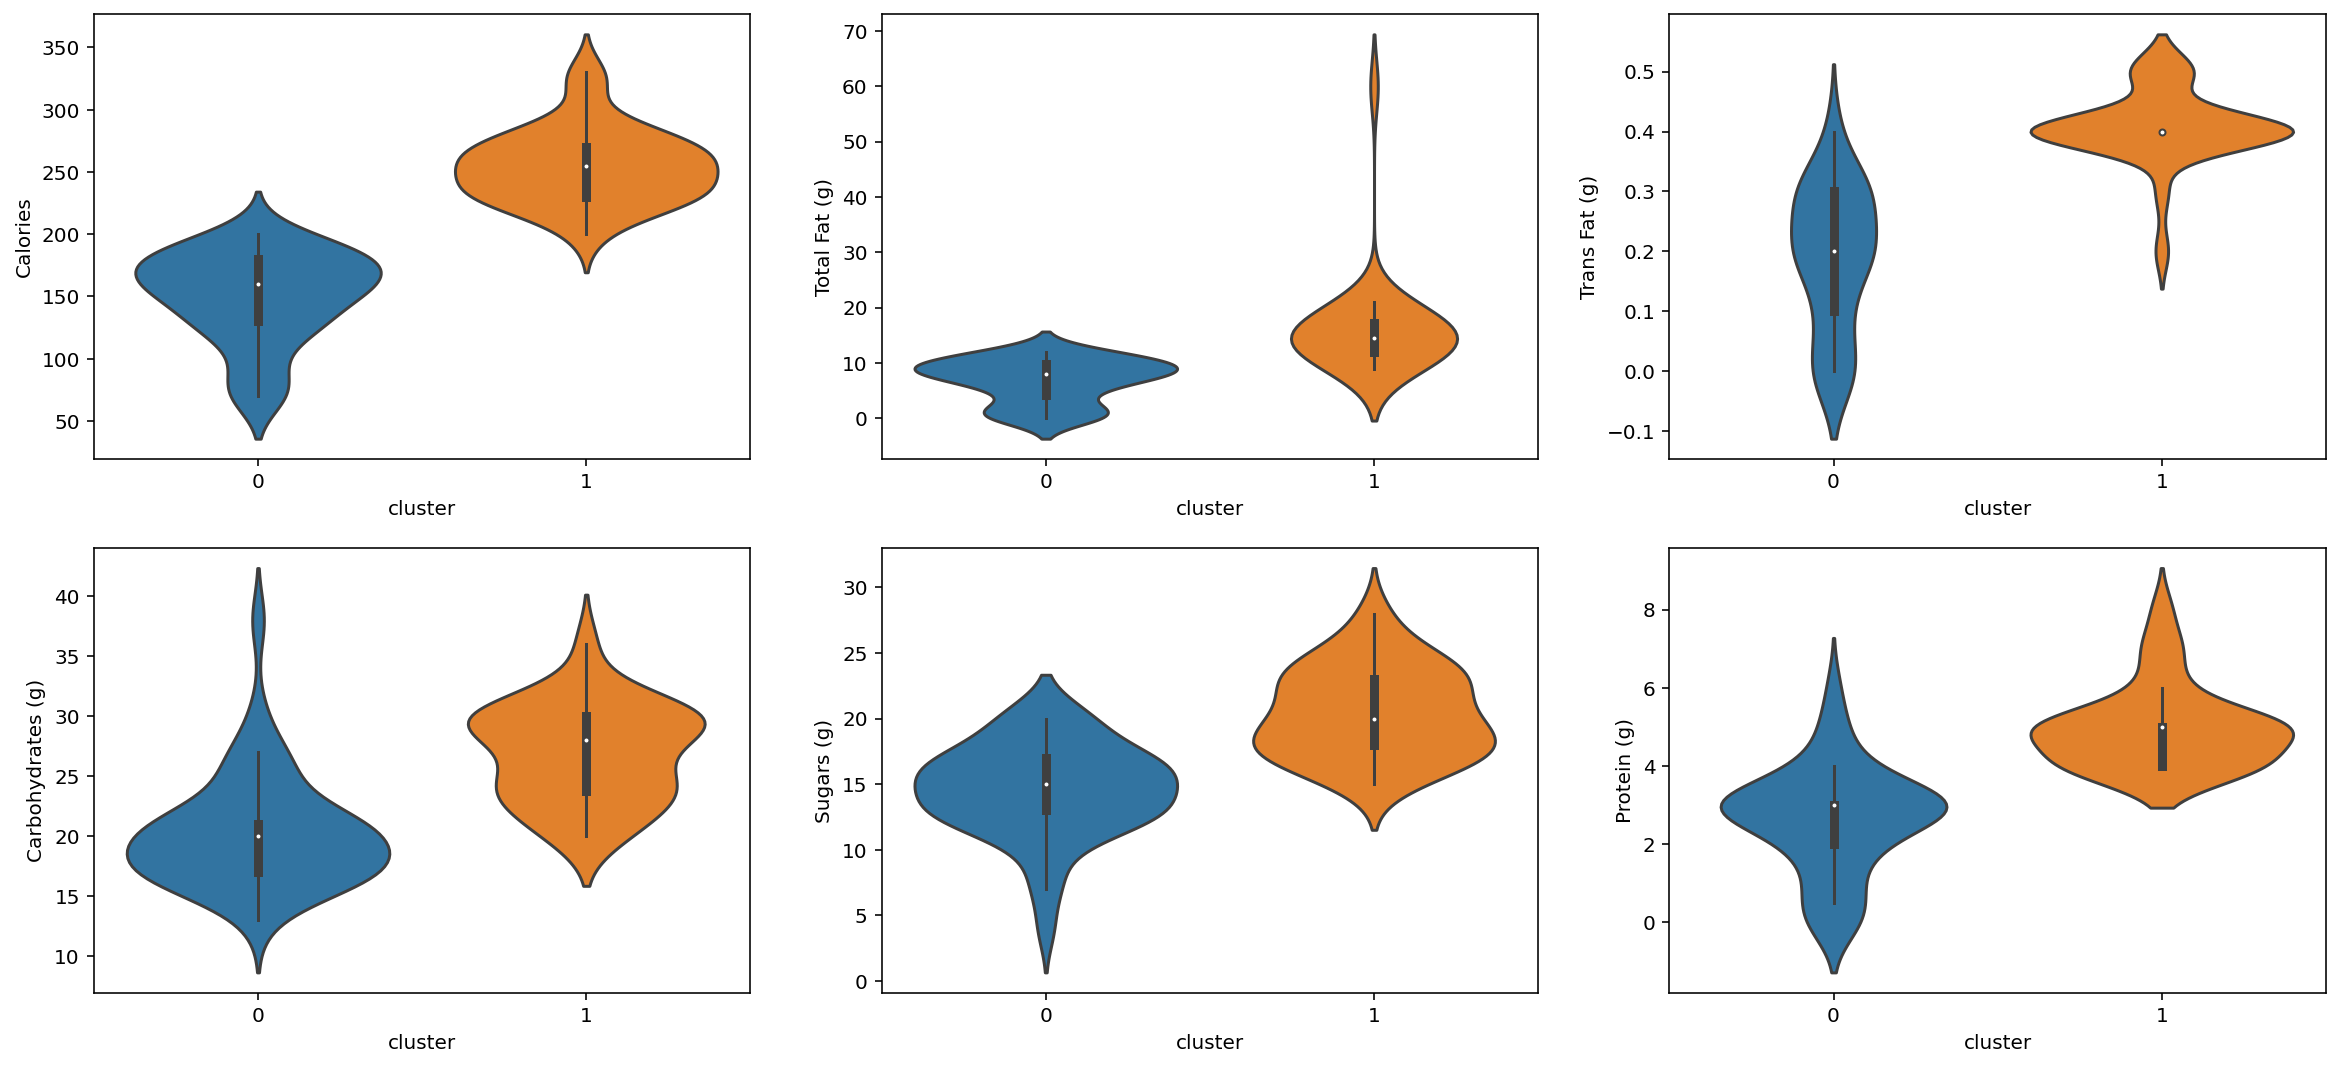

In [ ]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])



ຈະເປັນການເອົາ Data ມາ loop ສະແດງໃນຮູບແບບ violinplot ໂດຍໃຫ້ ຖັນ Cluster ເປັນເກນ x ແລະ ແກນ y ແມ່ນຈະ loop ຕາມ array cols ຂໍ້ມູນຈາກ df
>  ax : ວັດຖຸດຽວຂອງແກນ. ແກນວັດຖຸຖ້າມີພຽງ plot ອັນດຽວ, ຫຼືອາເຣຂອງແກນ.Axes objects ຖ້າມີຫຼາຍຕອນ plot, ຕາມທີ່ລະບຸໄວ້ໂດຍ nrows ແລະ ncols .

> violinplot ແມ່ນການສະແດງສະຖິຕິຂອງຂໍ້ມູນຕົວເລກ

> ຟັງຊັນ enumerate ໃນ Python ປ່ຽນ data collection object ເປັນວັດຖຸ enumerate

> ravel() ຖືກໃຊ້ເພື່ອສົ່ງຄືນອາເຣທີ່ຕິດກັນ. ຟັງຊັນນີ້ສົ່ງຄືນອາເຣ 1D ທີ່ມີອົງປະກອບການປ້ອນຂໍ້ມູນ.



In [31]:
dx=X
dx['cluster']=hc.labels_
dx


,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,0
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,0
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,0
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,0
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,0
...,...,...,...,...,...,...,...
65,0.155075,0.103675,0.857656,0.336470,0.915897,0.254761,1
66,-1.175713,-1.935544,-1.700508,0.829867,0.686477,-2.057917,0
67,-1.880874,-1.569065,-1.700508,-1.439226,-1.101967,-1.533898,0
68,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,0




> dx ເປັນໂຕແປເກັບຄ່າຈາກ dataframe X

> ແລະ ເພີ່ມຖັນ cluster ແລະ ມີການ cluster ແຕ່ລະຈຸດໃຊ້ AgglomerativeClustering





In [ ]:
df.groupby('cluster').head(3).sort_values('cluster')

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,1
11,Chocolate,230,13.0,0.4,25,18,5.0,1
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,1




> ໃຊ້ goupby ແຍກຂໍ້ມູນ dataframe df ແລະ ເອົາຂໍ້ມູນ 3 ແຖວມາສະແດງເລີ່ມຈາກ index 0 ແລະ ຈັດຂໍ້ມູນຈາກນ້ອຍໄປຫຼາຍໂດຍອິງໃສ່ column Cluster



#**Scikit-learn: KMeans Clustering**

>  KMeans Clustering ແມ່ນ unsupervised machine learning technique ໃຊ້ເພື່ອລະບຸກຸ່ມຂອງວັດຖຸຂໍ້ມູນໃນຊຸດຂໍ້ມູນ.



In [ ]:
from sklearn.cluster import KMeans



> ເປັນການ import kmeans ຈາກ library 



In [ ]:
model = KMeans(n_clusters=2)
model


KMeans(n_clusters=2)




> model ແມ່ນໂຕປ່ຽນ ຈາກການເອົາ Kmeans ໄປລະບຸຈຳນວນ cluster ທີ່ຈະສ້າງ


> n_clusters ຈໍານວນກຸ່ມທີ່ຈະປະກອບເປັນຈໍານວນ centroids ທີ່ຈະສ້າງ.



In [ ]:
# X=df[cols]

In [ ]:
model.fit(X)

KMeans(n_clusters=2)



> ແລ້ວເອົາ Model ມາທຳການ fit ຂໍ້ມູນ



In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int32)



> ເອົາ model ມາ cluster ແຕ່ລະຈຸດ



In [ ]:
df['cluster_kmeans']=model.labels_



> ເປັນການເພີ່ມ column 'cluster_kmeans' ໃນ dataframe df ແລະ cluster ແຕ່ລະຈຸດ



In [ ]:
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster,cluster_kmeans
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0,0




> ເອົາຂໍ້ມູນ df ມາສະແດງ 5 ແຖວທຳອິດ ໃຊ້ .head()

